#### 1. Crea un notebook, carga los csv. responde y justifica.

In [215]:
import pandas as pd
import dask.dataframe as dd


categories = pd.read_csv(r"..\data\categories.csv")
cities = pd.read_csv(r"..\data\cities.csv")
countries = pd.read_csv(r"..\data\countries.csv")
customers = pd.read_csv(r"..\data\customers.csv")
employees = pd.read_csv(r"..\data\employees.csv")
products = pd.read_csv(r"..\data\products.csv")
sales = pd.read_csv(r"..\data\sales.csv", parse_dates=["SalesDate"]) # -> Probar despues con Dask
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"], errors="coerce")

In [216]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         float64       
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 464.0+ MB


In [217]:
round(sales.isnull().sum()/len(sales) * 100, 4)

SalesID              0.0000
SalesPersonID        0.0000
CustomerID           0.0000
ProductID            0.0000
Quantity             0.0000
Discount             0.0000
TotalPrice           0.0000
SalesDate            0.9992
TransactionNumber    0.0000
dtype: float64

Como los valores nulos son solamente el 1% vamos a eliminar esas filas:

In [218]:
#sales = sales["SalesDate"].dropna()
sales = sales.dropna(subset=["SalesDate"])
round(sales.isnull().sum()/len(sales) * 100, 4)

SalesID              0.0
SalesPersonID        0.0
CustomerID           0.0
ProductID            0.0
Quantity             0.0
Discount             0.0
TotalPrice           0.0
SalesDate            0.0
TransactionNumber    0.0
dtype: float64

In [219]:
# No hay filas duplicadas
print(sales[sales.duplicated()])

Empty DataFrame
Columns: [SalesID, SalesPersonID, CustomerID, ProductID, Quantity, Discount, TotalPrice, SalesDate, TransactionNumber]
Index: []


In [220]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     452 non-null    int64  
 1   ProductName   452 non-null    object 
 2   Price         452 non-null    float64
 3   CategoryID    452 non-null    int64  
 4   Class         452 non-null    object 
 5   ModifyDate    452 non-null    object 
 6   Resistant     452 non-null    object 
 7   IsAllergic    452 non-null    object 
 8   VitalityDays  452 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 31.9+ KB


##### El campo TotalPrice en la tabla sales no tiene valores válidos. Utilizando la información de precios de la tabla products, 
##### calcula el valor real de la venta para cada registro y almacena en una nueva columna
TotalPriceCalculated=(Quantity×UnitPrice)×(1−Discount)

# (CLASE) AGARRA SOLAMENTE LOS CAMPOS NECESARIOS EN EL MERGE

In [ ]:
# TotalPriceCalculated=(Quantity×UnitPrice)×(1−Discount)

sales_products = pd.merge(sales, products, on="ProductID", how="left")
# (CLASE) : df = sales.merge(products[["ProductId", "Price"]], on="ProductID", how="left")
# IMPORTANTE!: trae solamente las columnas necesarias del otro dataframe

sales_products



,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,44.2337,1.0,High,26:53.6,Unknown,Unknown,41.0
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,62.5460,8.0,Low,41:12.4,Durable,FALSE,90.0
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,79.0184,11.0,Medium,18:29.9,Durable,TRUE,0.0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,81.3167,6.0,High,08:59.8,Durable,TRUE,90.0
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,79.9780,9.0,Low,33:15.5,Weak,FALSE,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690594,6758121,10,50938,300,13,0.0,0.0,2018-04-20 22:39:03.150,AHVBHVO7632V5YYD2VJT,Beans - Kidney; Canned,69.5694,5.0,Medium,35:16.8,Unknown,TRUE,0.0
6690595,6758122,18,85668,452,22,0.1,0.0,2018-01-13 15:08:18.700,M4IA0FS13J9F0GJD4BX8,Napkin White - Starched,28.5653,11.0,Low,39:42.9,Durable,Unknown,0.0
6690596,6758123,21,68409,405,18,0.0,0.0,2018-01-18 12:05:16.950,7VZJ77UGBSX2SNCC1GFW,Pastry - Raisin Muffin - Mini,0.4278,11.0,Medium,12:00.5,Durable,TRUE,0.0
6690597,6758124,17,90315,104,23,0.0,0.0,2018-02-26 08:13:37.850,3JTF5IF0YJLLXF9IRS8X,Tia Maria,98.2471,5.0,High,59:30.0,Unknown,FALSE,0.0


In [222]:
round(sales_products.isnull().sum()/len(sales_products) *100,4)

SalesID              0.0000
SalesPersonID        0.0000
CustomerID           0.0000
ProductID            0.0000
Quantity             0.0000
Discount             0.0000
TotalPrice           0.0000
SalesDate            0.0000
TransactionNumber    0.0000
ProductName          0.0003
Price                0.0003
CategoryID           0.0003
Class                0.0003
ModifyDate           0.0003
Resistant            0.0003
IsAllergic           0.0003
VitalityDays         0.0003
dtype: float64

como hay una cantidad despreciable de valores nulos procedemos a eliminarlos:

In [223]:
print(len(sales_products))
sales_products = sales_products.dropna()
print(len(sales_products))

6690599
6690582


In [234]:
# TotalPriceCalculated=(Quantity×UnitPrice)×(1−Discount)

sales_products["TotalPriceCalculated"] = (sales_products["Quantity"] * sales_products["Price"]) * (1 - sales_products["Discount"])

sales_products.head()

C:\Users\martin.tedesco\AppData\Local\Temp\ipykernel_17944\3855735100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_products["TotalPriceCalculated"] = (sales_products["Quantity"] * sales_products["Price"]) * (1 - sales_products["Discount"])


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,...,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,TotalPriceCalculated,IsOutlier,hora,DayOfWeek,EsFinDeSemana
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,...,High,26:53.6,Unknown,Unknown,41.0,309.63590,0,7,0,0
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,...,Low,41:12.4,Durable,FALSE,90.0,437.82200,0,16,4,0
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,...,Medium,18:29.9,Durable,TRUE,0.0,1896.44160,0,19,3,0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,...,High,08:59.8,Durable,TRUE,90.0,1236.01384,0,14,5,1
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,...,Low,33:15.5,Weak,FALSE,0.0,719.80200,0,15,0,0


#### 2. Detecta los outliers en la columna de ventas totales (TotalPriceCalculated)
Utilizando el criterio del rango intercuartílico (IQR). 

Luego, crea una nueva columna llamada IsOutlier que tenga el valor 1 si el registro es un outlier y 0 en caso contrario.

<Axes: >

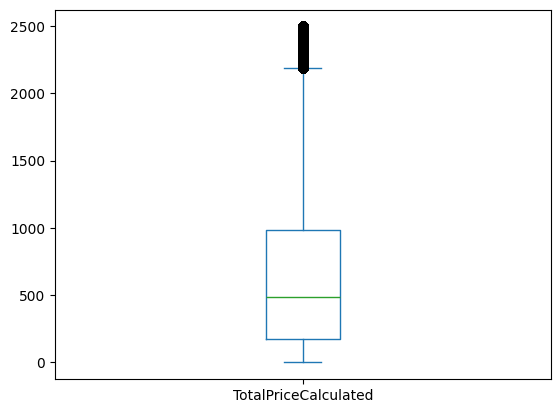

In [225]:
sales_products["TotalPriceCalculated"].plot(kind="box")

#### Esto nos indica que pueden haber varios outliers. Vamos a calcularlos ...

In [ ]:
# calculamos los cuartiles
Q1 = sales_products["TotalPriceCalculated"].quantile(0.25)
Q3 = sales_products["TotalPriceCalculated"].quantile(0.75)
IQR = Q3 - Q1

# cota inferior
lower_bound = Q1 - 1.5 * IQR
# cota superior
upper_bound = Q3 + 1.5 * IQR

sales_products["IsOutlier"] = (
    (sales_products["TotalPriceCalculated"] < lower_bound) 
    | (sales_products["TotalPriceCalculated"] > upper_bound)).astype(int)

#sales_products[sales_products["IsOutlier"] > 0]
sales_products

C:\Users\martin.tedesco\AppData\Local\Temp\ipykernel_17944\760858848.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_products["IsOutlier"] = (


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,...,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,TotalPriceCalculated,IsOutlier,hora,DayOfWeek,EsFinDeSemana
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,...,High,26:53.6,Unknown,Unknown,41.0,309.63590,0,7,0,0
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,...,Low,41:12.4,Durable,FALSE,90.0,437.82200,0,16,4,0
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,...,Medium,18:29.9,Durable,TRUE,0.0,1896.44160,0,19,3,0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,...,High,08:59.8,Durable,TRUE,90.0,1236.01384,0,14,5,1
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,...,Low,33:15.5,Weak,FALSE,0.0,719.80200,0,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690594,6758121,10,50938,300,13,0.0,0.0,2018-04-20 22:39:03.150,AHVBHVO7632V5YYD2VJT,Beans - Kidney; Canned,...,Medium,35:16.8,Unknown,TRUE,0.0,904.40220,0,22,4,0
6690595,6758122,18,85668,452,22,0.1,0.0,2018-01-13 15:08:18.700,M4IA0FS13J9F0GJD4BX8,Napkin White - Starched,...,Low,39:42.9,Durable,Unknown,0.0,565.59294,0,15,5,1
6690596,6758123,21,68409,405,18,0.0,0.0,2018-01-18 12:05:16.950,7VZJ77UGBSX2SNCC1GFW,Pastry - Raisin Muffin - Mini,...,Medium,12:00.5,Durable,TRUE,0.0,7.70040,0,12,3,0
6690597,6758124,17,90315,104,23,0.0,0.0,2018-02-26 08:13:37.850,3JTF5IF0YJLLXF9IRS8X,Tia Maria,...,High,59:30.0,Unknown,FALSE,0.0,2259.68330,1,8,0,0


In [ ]:
# No representa ni el 1% los outliers
sales_products["IsOutlier"].value_counts() /len(sales_products) * 100

IsOutlier
0    99.28634
1     0.71366
Name: count, dtype: float64

#### 3. A partir de la columna SalesDate, crea una nueva columna que contenga únicamente la hora de la venta.

In [256]:
sales_products["SalesDate"] = pd.to_datetime(sales_products["SalesDate"], errors="coerce")
sales_products["hora"] = sales_products["SalesDate"].dt.hour

sales_products[["SalesDate","hora"]]

C:\Users\martin.tedesco\AppData\Local\Temp\ipykernel_17944\1545045407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_products["SalesDate"] = pd.to_datetime(sales_products["SalesDate"], errors="coerce")
C:\Users\martin.tedesco\AppData\Local\Temp\ipykernel_17944\1545045407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_products["hora"] = sales_products["SalesDate"].dt.hour


,SalesDate,hora
0,2018-02-05 07:38:25.430,7
1,2018-02-02 16:03:31.150,16
2,2018-05-03 19:31:56.880,19
3,2018-04-07 14:43:55.420,14
4,2018-02-12 15:37:03.940,15
...,...,...
6690594,2018-04-20 22:39:03.150,22
6690595,2018-01-13 15:08:18.700,15
6690596,2018-01-18 12:05:16.950,12
6690597,2018-02-26 08:13:37.850,8


Luego, identifica en qué hora del día se concentran más ventas totales (TotalPriceCalculated)

In [258]:
import numpy as np

#print(sales_products.groupby("hora")["TotalPriceCalculated"].sum().reset_index(name="total").sort_values(by="total", ascending=False))
#
#print((sales_products.groupby("hora")["TotalPriceCalculated"].sum() / 
#       sales_products["TotalPriceCalculated"].sum() *100)
#       .reset_index(name="total %")
#       .sort_values(by="total %", ascending=False)
#       )
      
Total_Sales_Hour_Grouped = (sales_products.groupby("hora")["TotalPriceCalculated"].sum()
                            .reset_index(name="TotalPricePerHour").astype("Float64")
                            )

# (clase) sales_hour = sales_products.groupby("hora")["TotalPriceCalculated"].sum().reset_index()
#         max_hour = sales_hour[sales_hour["TotalPriceCalculated"] == sales_hour["TotalPriceCalculated"].max()]

total_sales = Total_Sales_Hour_Grouped["TotalPricePerHour"].sum()
#print(total_sales)

Total_Sales_Hour_Grouped["total %"] = (Total_Sales_Hour_Grouped["TotalPricePerHour"] / total_sales * 100)
print(Total_Sales_Hour_Grouped.sort_values(by="total %", ascending=False).reset_index(drop=True).head(1))


   hora  TotalPricePerHour   total %
0  16.0    179014421.23606  4.189221


Vemos que a las 16hs se concentra la mayor cantidad de ventas

#### ¿La empresa vende más durante los días de semana o en el fin de semana? 

Utiliza la columna SalesDate para identificar el día de la semana de cada venta, clasifica los registros como Entre semana o Fin de semana, 

y compara el total de ventas (TotalPriceCalculated) entre ambos grupos.

In [ ]:
sales_products["DayOfWeek"] = sales_products["SalesDate"].dt.dayofweek.astype("int")  # Lunes = 0
#sales_products["NameDayOfWeek"] = sales_products["SalesDate"].dt.day_name().astype("string")

# (clase) df["DiaSemana"] = df["SalesDate"].dt.weekday # 0 a 6

sales_products["EsFinDeSemana"] = (sales_products["DayOfWeek"] >= 5).astype(int)

# (clase) df["TipoDia"] = df["SalesDate"].apply(lambda x: "Entre semana" if x<5 else "Fin de semana")

sales_products[["SalesDate","DayOfWeek","EsFinDeSemana"]]


Total_Sales_Day_Of_Week_Grouped = (sales_products.groupby("EsFinDeSemana")["TotalPriceCalculated"].sum()
                            .reset_index(name="TotalPricePerDayOfWeek").astype("Float64")
                            )

total_sales = Total_Sales_Day_Of_Week_Grouped["TotalPricePerDayOfWeek"].sum()
#print(total_sales)

Total_Sales_Day_Of_Week_Grouped["total %"] = (Total_Sales_Day_Of_Week_Grouped["TotalPricePerDayOfWeek"] / total_sales * 100)
print(Total_Sales_Day_Of_Week_Grouped.sort_values(by="total %", ascending=False).reset_index(drop=True))

C:\Users\martin.tedesco\AppData\Local\Temp\ipykernel_17944\354865778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_products["DayOfWeek"] = sales_products["SalesDate"].dt.dayofweek.astype("int")  # Lunes = 0
C:\Users\martin.tedesco\AppData\Local\Temp\ipykernel_17944\354865778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_products["EsFinDeSemana"] = (sales_products["DayOfWeek"] >= 5).astype(int)


   EsFinDeSemana  TotalPricePerDayOfWeek    total %
0            0.0        3080351837.90699  72.085116
1            1.0        1192862950.43727  27.914884


Concluimos que el 72% de las ventas es durante la semana.

#### 4. Como parte del proceso de feature engineering, en el mismo df que vienes trabajando, calcula dos nuevas columnas en el dataset de ventas:

La edad del empleado al momento de su contratación y años de experiencia al momento de realizar cada venta.

In [230]:
employees

,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate
0,1,Nicole,T,Fuller,1981-03-07 00:00:00.000,F,80,2011-06-20 07:15:36.920
1,2,Christine,W,Palmer,1968-01-25 00:00:00.000,F,4,2011-04-27 04:07:56.930
2,3,Pablo,Y,Cline,1963-02-09 00:00:00.000,M,70,2012-03-30 18:55:23.270
3,4,Darnell,O,Nielsen,1989-02-06 00:00:00.000,M,39,2014-03-06 06:55:02.780
4,5,Desiree,L,Stuart,1963-05-03 00:00:00.000,F,23,2014-11-16 22:59:54.720
5,6,Holly,E,Collins,1987-01-13 00:00:00.000,M,65,2013-06-22 13:20:18.080
6,7,Chadwick,P,Cook,1970-05-02 00:00:00.000,M,39,2016-07-10 06:22:00.670
7,8,Julie,E,Dyer,1956-12-13 00:00:00.000,M,18,2014-10-14 23:12:53.420
8,9,Daphne,X,King,1956-05-02 00:00:00.000,F,39,2013-04-17 14:48:02.700
9,10,Jean,P,Vang,1963-12-30 00:00:00.000,M,9,2012-07-23 15:02:12.640


In [231]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EmployeeID     23 non-null     int64 
 1   FirstName      23 non-null     object
 2   MiddleInitial  23 non-null     object
 3   LastName       23 non-null     object
 4   BirthDate      23 non-null     object
 5   Gender         23 non-null     object
 6   CityID         23 non-null     int64 
 7   HireDate       23 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.6+ KB


Parseamos las fechas a datetime

In [ ]:
sales_products_employees = pd.merge(sales_products, employees, left_on="SalesPersonID", right_on="EmployeeID", how="left")  
# expando el dataframe con el que venia trabajando. Ver si esta bien enfocado.

# (clase) agarro de employees unicamente las columnas que necesitas traer

sales_products_employees["BirthDate"] = pd.to_datetime(sales_products_employees["BirthDate"], errors="coerce")
sales_products_employees["HireDate"] = pd.to_datetime(sales_products_employees["HireDate"], errors="coerce")

sales_products_employees

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,...,DayOfWeek,EsFinDeSemana,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,...,0,0,6,Holly,E,Collins,1987-01-13,M,65,2013-06-22 13:20:18.080
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,...,4,0,16,Chadwick,U,Walton,1951-07-07,M,28,2017-02-10 11:21:26.650
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,...,3,0,13,Katina,Y,Marks,1963-04-18,M,68,2011-12-12 10:43:52.940
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,...,5,1,8,Julie,E,Dyer,1956-12-13,M,18,2014-10-14 23:12:53.420
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,...,0,0,10,Jean,P,Vang,1963-12-30,M,9,2012-07-23 15:02:12.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690577,6758121,10,50938,300,13,0.0,0.0,2018-04-20 22:39:03.150,AHVBHVO7632V5YYD2VJT,Beans - Kidney; Canned,...,4,0,10,Jean,P,Vang,1963-12-30,M,9,2012-07-23 15:02:12.640
6690578,6758122,18,85668,452,22,0.1,0.0,2018-01-13 15:08:18.700,M4IA0FS13J9F0GJD4BX8,Napkin White - Starched,...,5,1,18,Warren,C,Bartlett,1964-03-09,M,58,2010-02-22 21:55:48.620
6690579,6758123,21,68409,405,18,0.0,0.0,2018-01-18 12:05:16.950,7VZJ77UGBSX2SNCC1GFW,Pastry - Raisin Muffin - Mini,...,3,0,21,Devon,D,Brewer,1966-04-25,M,65,2016-01-24 02:13:24.340
6690580,6758124,17,90315,104,23,0.0,0.0,2018-02-26 08:13:37.850,3JTF5IF0YJLLXF9IRS8X,Tia Maria,...,0,0,17,Seth,D,Franco,1989-08-29,M,80,2010-07-11 09:23:03.490


In [238]:
sales_products_employees.isnull().sum()

SalesID                 0
SalesPersonID           0
CustomerID              0
ProductID               0
Quantity                0
Discount                0
TotalPrice              0
SalesDate               0
TransactionNumber       0
ProductName             0
Price                   0
CategoryID              0
Class                   0
ModifyDate              0
Resistant               0
IsAllergic              0
VitalityDays            0
TotalPriceCalculated    0
IsOutlier               0
hora                    0
DayOfWeek               0
EsFinDeSemana           0
EmployeeID              0
FirstName               0
MiddleInitial           0
LastName                0
BirthDate               0
Gender                  0
CityID                  0
HireDate                0
dtype: int64

In [ ]:
sales_products_employees["EdadAlContratar"] = ((sales_products_employees["HireDate"] - sales_products_employees["BirthDate"]).dt.total_seconds() / 31536000).astype(int)
# (clase) df["EdadAlContratar"] = (df["HireDate"] - df["BirthDate"]).dt.days // 365
# // -> devuelve la parte entera de la division

sales_products_employees["AñosExperienciaAlVender"] = ((sales_products_employees["SalesDate"] - sales_products_employees["HireDate"]).dt.total_seconds() / 31536000).astype(int)
# (clase) df["EdadAlCAñosExperienciaAlVenderontratar"] = (df["SalesDate"] - df["HireDate"]).dt.days // 365

#sales_products_employees[["BirthDate", "HireDate","SalesDate","EdadAlContratar","AñosExperienciaAlVender"]]

#np.sort(sales_products_employees["EdadAlContratar"].unique())

sales_products_employees
#sales_products_employees["IsOutlier"].sum()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,...,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate,EdadAlContratar,AñosExperienciaAlVender
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,...,6,Holly,E,Collins,1987-01-13,M,65,2013-06-22 13:20:18.080,26,4
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,Sardines,...,16,Chadwick,U,Walton,1951-07-07,M,28,2017-02-10 11:21:26.650,65,0
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,Crab - Imitation Flakes,...,13,Katina,Y,Marks,1963-04-18,M,68,2011-12-12 10:43:52.940,48,6
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,Smirnoff Green Apple Twist,...,8,Julie,E,Dyer,1956-12-13,M,18,2014-10-14 23:12:53.420,57,3
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,Coffee - Dark Roast,...,10,Jean,P,Vang,1963-12-30,M,9,2012-07-23 15:02:12.640,48,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6690577,6758121,10,50938,300,13,0.0,0.0,2018-04-20 22:39:03.150,AHVBHVO7632V5YYD2VJT,Beans - Kidney; Canned,...,10,Jean,P,Vang,1963-12-30,M,9,2012-07-23 15:02:12.640,48,5
6690578,6758122,18,85668,452,22,0.1,0.0,2018-01-13 15:08:18.700,M4IA0FS13J9F0GJD4BX8,Napkin White - Starched,...,18,Warren,C,Bartlett,1964-03-09,M,58,2010-02-22 21:55:48.620,45,7
6690579,6758123,21,68409,405,18,0.0,0.0,2018-01-18 12:05:16.950,7VZJ77UGBSX2SNCC1GFW,Pastry - Raisin Muffin - Mini,...,21,Devon,D,Brewer,1966-04-25,M,65,2016-01-24 02:13:24.340,49,1
6690580,6758124,17,90315,104,23,0.0,0.0,2018-02-26 08:13:37.850,3JTF5IF0YJLLXF9IRS8X,Tia Maria,...,17,Seth,D,Franco,1989-08-29,M,80,2010-07-11 09:23:03.490,20,7


#### 5.
Prepara un único dataset definitivo para modelado que combine información relevante de las tablas disponibles.

Incluye las features que se han calculado previamente.

Aplica transformaciones adecuadas a las variables categóricas y a las variables numéricas (si lo consideras necesario) para dejar los datos listos para ser utilizados por un modelo de machine learning.

Justifica las transformaciones realizadas. La variable objetivo es TotalPriceCalculated, por lo que debe quedar sin transformaciones.

In [260]:
# Features:

# TotalPriceCalculated
# IsOutlier
# hora
# DayOfWeek
# EsFinDeSemana
# EdadAlContratar
# AñosExperienciaAlVender

### (clase) transformaciones que el profesor tomo relevantes. 
### Nosotros podemos tomar otras...

In [ ]:
products

In [ ]:
df = df.merge(
    products[["ProductID","CategoryID","Class","Resistant","IsAllergic","VitalityDays"]],
    on="ProductID",
    how="left"
)

df = df.merge(
    categories[["CategoryID","CategoryName"]],
    on="CategoryID",
    how="left"
)

df = df.merge(
    customers[["CustomerID","CityID"]].rename(columns={"CityID": "CityID_Customer"}),
    on="CustomerID",
    how="left"
)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# (clase) agrego otras features para hacer el analisis

# Label Encoding para variables con pocos valores ordenables o binarias
label_cols = ["TipoDia", "Gender_Employee", "Class"]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-Hot Encoding para variables categoricas nominales (no ordenable)
one_hot_cols = ["Resistant","IsAllergic","CategoryName"] # -> No tiene mucho sentido un one-hot para la columna "CategoryName"
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True) # -> creo drop_first=True elimina la columna original
df.head()


# -> La ciudad puede ser un tipo de categoria importante
# IMPORTATE! -> Analizar si las decisiones de columnas para hacer encoding sirven o se puede mejorar
# Entonces mejorar para la entrega.
# Ver la recomendacion de cantidad de columnas para hacer one-hot (< 5 categorias) o label-encoding